In [26]:
#1.  **Chuẩn hóa ngày tháng:** Cột `Join_Date` đang bị trộn lẫn nhiều định dạng khác nhau. Hãy chuyển đổi cột này về dạng `datetime` chuẩn.
import pandas as pd
 
df_raw = pd.read_csv(r'C:\Users\TRUNG NGHIA\Desktop\buoi 1\datasets\raw_export_crm.csv')
 
df_raw['Join_Date'] = pd.to_datetime(df_raw['Join_Date'], errors='coerce', dayfirst=True)
df_raw['Join_Date'] = df_raw['Join_Date'].dt.strftime('%d/%m/%Y')
 
print(df_raw.head(11))

    Customer_ID     Location  Frequency  Avg_Order_Value  \
0         86019  Ho Chi Minh          8         147000.0   
1         69638      Da Nang         27        1827000.0   
2         83975      Da Nang          2         436000.0   
3         90120        Other          3         159000.0   
4         30730        Other          5         504000.0   
5         55309       Ha Noi          5         256000.0   
6         71694          NaN          0              NaN   
7         77839        Other         19        2064000.0   
8         24592      Da Nang          4         270000.0   
9         32782      Da Nang          9         272000.0   
10        20500       Ha Noi          0              NaN   

    Days_Since_Last_Order  Est_Income  Gender   Join_Date  Historical_CLV  \
0                      26  14230000.0     Nam  29/10/2024         2660000   
1                      14  43150000.0     Nam         NaN        48540000   
2                     223  12240000.0       F  0

In [27]:
print(df_raw['Gender'].unique())

['Nam' 'F' 'Nu' 'Female' 'Male' nan 'M']


In [28]:
#2.  **Chuẩn hóa định danh:** Cột `Gender` chứa các giá trị không đồng nhất (ví dụ: 'Nam', 'nu', 'M'...). Hãy quy hoạch tất cả về 2 nhóm duy nhất: `'Male'` và `'Female'.`

def getgender(gender_value):
    gender_mapping = {
        'Nam': 'Male', 
        'Nu': 'Female',
        'M': 'Male',
        'F': 'Female'
    }
 
    return gender_mapping.get(gender_value, 'không xác định') 
    return 'Unknown' # Xử lý các kiểu dữ liệu khác không phải chuỗi

# Áp dụng hàm getgender vào cột 'Gender'
df_raw['Gender'] = df_raw['Gender'].apply(getgender)

print(df_raw['Gender'].unique())

['Male' 'Female' 'không xác định']


In [7]:
#3.  **Xử lý logic nghiệp vụ (Business Logic):**
#    * Kiểm tra cột `Avg_Order_Value` (Giá trị đơn hàng trung bình).
#    * Bạn sẽ thấy có các giá trị `NaN`. Hãy kiểm tra cột `Frequency` của những dòng này.
#    * *Yêu cầu:* Nếu khách hàng chưa mua lần nào (`Frequency = 0`), hãy điền `0` vào chỗ trống. Tuyệt đối không điền bằng giá trị trung bình (Mean).

df_raw.loc[df_raw['Frequency'] == 0, 'Avg_Order_Value'] = df_raw.loc[df_raw['Frequency'] == 0, 'Avg_Order_Value'].fillna(0)
print(df_raw[df_raw['Frequency'] == 0].head())

    Customer_ID     Location  Frequency  Avg_Order_Value  \
6         71694          NaN          0              0.0   
10        20500       Ha Noi          0              0.0   
29        53309  Ho Chi Minh          0              0.0   
32        20543      Da Nang          0              0.0   
37        34890  Ho Chi Minh          0              0.0   

    Days_Since_Last_Order  Est_Income          Gender   Join_Date  \
6                      58   8970000.0  không xác định         NaN   
10                    359         0.0          Female         NaN   
29                    530  11680000.0          Female  05/07/2024   
32                    271   7680000.0          Female         NaN   
37                    330   6880000.0  không xác định         NaN   

    Historical_CLV Source_Traffic Is_Active  
6                0           Zalo         Y  
10         1080000         Direct         N  
29               0       Facebook         N  
32          790000         Google       

In [9]:
#2.1.  Tạo cột mới tên là `Total_Revenue` (Tổng doanh thu) theo công thức:
df_raw['Total_Revenue'] = df_raw['Frequency'] * df_raw['Avg_Order_Value']
print(df_raw.head(11))

    Customer_ID     Location  Frequency  Avg_Order_Value  \
0         86019  Ho Chi Minh          8         147000.0   
1         69638      Da Nang         27        1827000.0   
2         83975      Da Nang          2         436000.0   
3         90120        Other          3         159000.0   
4         30730        Other          5         504000.0   
5         55309       Ha Noi          5         256000.0   
6         71694          NaN          0              0.0   
7         77839        Other         19        2064000.0   
8         24592      Da Nang          4         270000.0   
9         32782      Da Nang          9         272000.0   
10        20500       Ha Noi          0              0.0   

    Days_Since_Last_Order  Est_Income          Gender   Join_Date  \
0                      26  14230000.0            Male  29/10/2024   
1                      14  43150000.0            Male         NaN   
2                     223  12240000.0          Female  04/04/2023   
3  

In [11]:
#2.2.Dựa trên cột mới này, hãy tính Tổng doanh thu của từng Khu vực (Location). Khu vực nào đang đóng góp doanh thu lớn nhất cho công ty?
total_revenue_by_location = df_raw.groupby('Location')['Total_Revenue'].sum()

top_location = total_revenue_by_location.idxmax()
max_revenue = total_revenue_by_location.max()

print("Tổng doanh thu của từng Khu vực:")
for location, revenue in total_revenue_by_location.items():
    print(f"  {location}: {revenue:,.0f} VNĐ")

print(f"\nKhu vực đóng góp doanh thu lớn nhất là: {top_location} với tổng doanh thu là {max_revenue:,.0f} VNĐ")

Tổng doanh thu của từng Khu vực:
  Da Nang: 711,283,000 VNĐ
  Ha Noi: 1,859,701,000 VNĐ
  Ho Chi Minh: 2,694,458,000 VNĐ
  Other: 1,123,037,000 VNĐ

Khu vực đóng góp doanh thu lớn nhất là: Ho Chi Minh với tổng doanh thu là 2,694,458,000 VNĐ


In [13]:
#3.  Tính mức **Thu nhập trung bình (`Est_Income`)** của nhóm khách hàng Nam so với Nữ.

average_income_male = df_raw[df_raw['Gender'] == 'Male']['Est_Income'].mean()
average_income_female = df_raw[df_raw['Gender'] == 'Female']['Est_Income'].mean()

print(f"Thu nhập trung bình của khách hàng Nam: {average_income_male:,.2f} VNĐ")
print(f"Thu nhập trung bình của khách hàng Nữ: {average_income_female:,.2f} VNĐ")

Thu nhập trung bình của khách hàng Nam: 22,622,256.27 VNĐ
Thu nhập trung bình của khách hàng Nữ: 21,475,531.25 VNĐ



Chọn biểu đồ cột vì dễ nhìn và dễ so sánh Số lượng khách hàng giữa các Khu vực, các cột hiển thị mức cao thấp khác nhau rõ rệt nhất so với biểu đồ khác


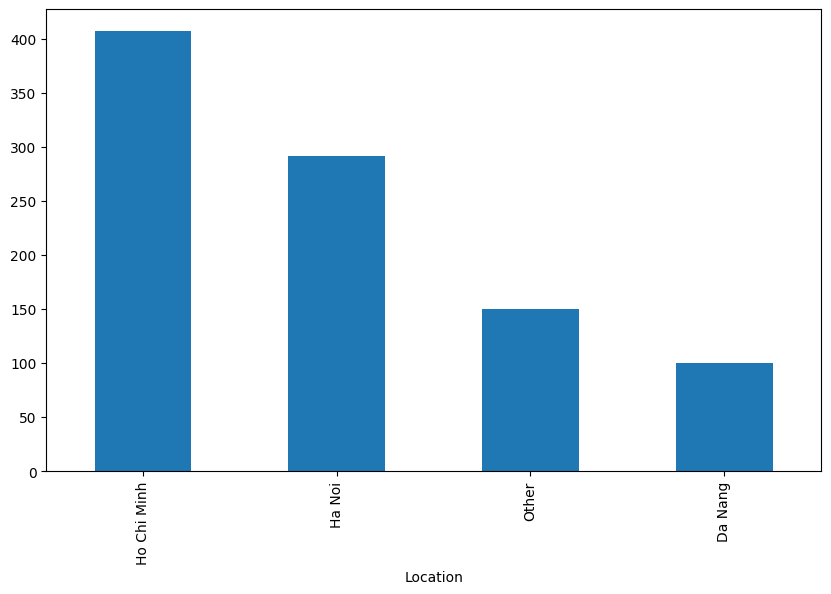

In [16]:
#1.  **Insight 1:** So sánh **số lượng khách hàng** giữa các Khu vực (`Location`) để xem nơi nào đông khách nhất.
import matplotlib.pyplot as plt
barchart_location = df_raw['Location'].value_counts().plot(kind='bar', figsize=(10, 6))
print(f"\nChọn biểu đồ cột vì dễ nhìn và dễ so sánh Số lượng khách hàng giữa các Khu vực, các cột hiển thị mức cao thấp khác nhau rõ rệt nhất so với biểu đồ khác")


Chọn biểu đồ scatter vì dễ nhìn và dễ thấy mối quan hệ giữa thu nhập và mức chi tiêu của các khách hàng có sự khác biệt, người có thu nhập hơi thấp mua sắm nhiều hơn so với người có thu nhập cao


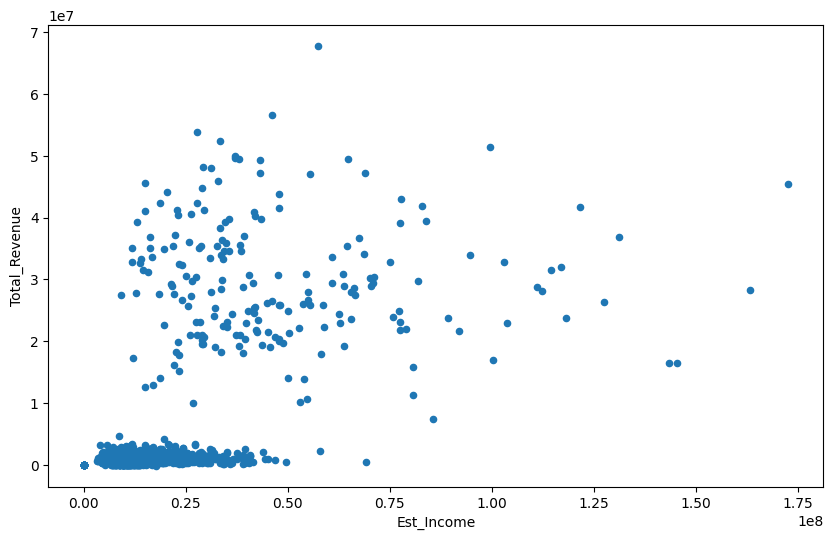

In [20]:
#2.  **Insight 2:** Thể hiện mối quan hệ (tương quan) giữa **Thu nhập (`Est_Income`)** và **Tổng chi tiêu (`Total_Revenue`)**. (Gợi ý: Người giàu có chắc chắn chi tiêu nhiều hơn không?)
piechart = df_raw.plot.scatter(x='Est_Income', y='Total_Revenue', figsize=(10, 6))
print(f"\nChọn biểu đồ scatter vì dễ nhìn và dễ thấy mối quan hệ giữa thu nhập và mức chi tiêu của các khách hàng có sự khác biệt, người có thu nhập hơi thấp mua sắm nhiều hơn so với người có thu nhập cao")

In [33]:
#2.1.1. Kiểm tra kiểu dữ liệu (dtype) của cột TotalCharges. Tại sao Pandas lại hiểu cột này là Object thay vì số?
import pandas as pd
df = pd.read_csv(r'C:\Users\TRUNG NGHIA\Desktop\buoi 1\datasets\telecom_churn_vn_raw.csv')

df.info()
print(f"\nPandas hiểu cột TotalCharges là int vì TotalCharges đang ở dạng số và không có chỗ bị trống")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       1000 non-null   object
 1   SeniorCitizen    1000 non-null   int64 
 2   tenure           1000 non-null   int64 
 3   InternetService  1000 non-null   object
 4   Contract_Type    1000 non-null   object
 5   OnlineSecurity   1000 non-null   object
 6   TechSupport      1000 non-null   object
 7   PaymentMethod    1000 non-null   object
 8   MonthlyCharges   1000 non-null   int64 
 9   Churn            1000 non-null   object
 10  TotalCharges     1000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 86.1+ KB

Pandas hiểu cột TotalCharges là int vì TotalCharges đang ở dạng số và không có chỗ bị trống


In [43]:
#2.1.2. chuyển đổi cột `TotalCharges` sang dạng số thực (`float`)
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Kiểm tra lại kiểu dữ liệu của cột để xác nhận

print(df['TotalCharges'].dtype)

float64


In [35]:
print(df['PaymentMethod'].unique())

['Credit card (automatic)' 'Thu ho tai nha' 'Bank Transfer (Auto)'
 'Momo/ZaloPay' 'Electronic check' 'Chuyen khoan']


In [36]:
#2.1.3.Nhóm dữ liệu: Cột PaymentMethod đang lẫn lộn tiếng Anh và tiếng Việt (Ví dụ: "Chuyen khoan" và "Bank Transfer"). Hãy đổi tên và gom chúng lại thành các nhóm thống nhất (Ví dụ: gom hết về "Bank", "Wallet", "Card"...).
def getPaymentMethod(PaymentMethod_value):
    PaymentMethod_mapping = {
        'Credit card (automatic)': 'Card',
        'Thu ho tai nha': 'Bank',
        'Bank Transfer (Auto)': 'Bank',
        'Momo/ZaloPay': 'Wallet',
        'Electronic check': 'Bank',
        'Chuyen khoan': 'Bank',
    }

    return PaymentMethod_mapping.get(PaymentMethod_value.strip(), 'Unknown')
    return 'Unknown' # Xử lý các kiểu dữ liệu khác không phải chuỗi

#Áp dụng hàm getPaymentMethod vào cột 'PaymentMethod'
df['PaymentMethod'] = df['PaymentMethod'].apply(getPaymentMethod)

print(df['PaymentMethod'].unique())

['Card' 'Bank' 'Wallet']


In [38]:
#2.2.1.Tính tỷ lệ % khách hàng đã rời mạng (Churn = 'Yes') trên tổng số khách hàng.
churn_rate = (df['Churn'] == 'Yes').mean() * 100
print(f"Tỷ lệ khách hàng đã rời mạng (Churn = 'Yes'): {churn_rate:.2f}%")

Tỷ lệ khách hàng đã rời mạng (Churn = 'Yes'): 25.30%


In [37]:
#2.2.2.Lọc ra danh sách "Khách hàng VIP có nguy cơ cao" thỏa mãn 2 điều kiện:
## Cước phí hàng tháng (MonthlyCharges) > 1.000.000 VND.
## Đã rời mạng (Churn = 'Yes').
## Yêu cầu: In ra 5 dòng đầu tiên của danh sách này.

# Filter for VIP high-risk customers
vip_high_risk_customers = df[
    (df['MonthlyCharges'] > 1000000) &
    (df['Churn'] == 'Yes')
]

# Print the first 5 rows of the filtered list
print("Khách hàng VIP có nguy cơ cao:")
print(vip_high_risk_customers.head(5))

Khách hàng VIP có nguy cơ cao:
Empty DataFrame
Columns: [CustomerID, SeniorCitizen, tenure, InternetService, Contract_Type, OnlineSecurity, TechSupport, PaymentMethod, MonthlyCharges, Churn, TotalCharges]
Index: []


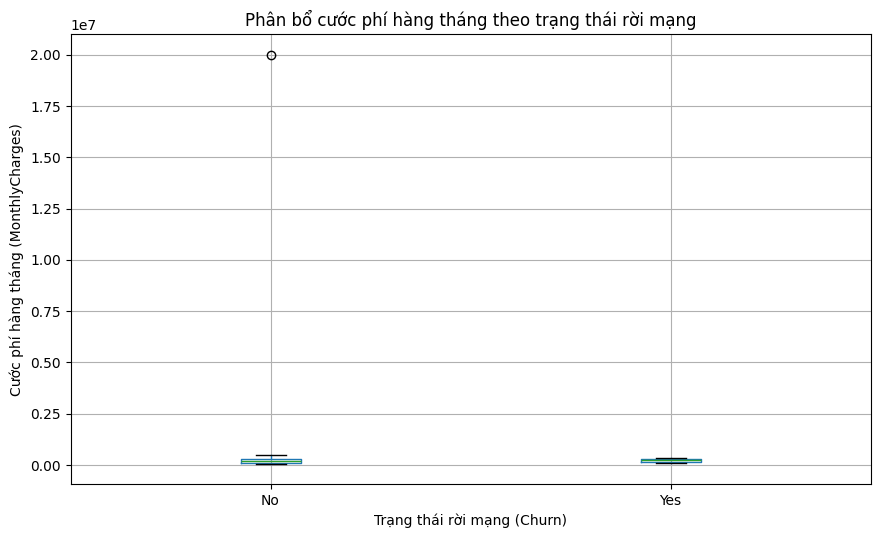


Nhóm khách hàng rời đi (Churn=Yes) và nhóm ở lại (Churn=No) có sự khác biệt về mức cước phí hàng tháng rất ít không đáng kể


In [44]:
#Câu hỏi 1: "Nhóm khách hàng rời đi (Churn=Yes) và nhóm ở lại (Churn=No) có sự khác biệt nào về mức cước phí hàng tháng (MonthlyCharges) không?"
# Gợi ý: Hãy dùng biểu đồ thể hiện được sự phân tán, trung vị (median) và ngoại lai (outliers).
import matplotlib.pyplot as plt
boxplot = df.boxplot(column='MonthlyCharges', by='Churn', figsize=(10, 6))
plt.title('Phân bổ cước phí hàng tháng theo trạng thái rời mạng')
plt.xlabel('Trạng thái rời mạng (Churn)')
plt.ylabel('Cước phí hàng tháng (MonthlyCharges)')
plt.suptitle('') 
plt.show()
print(f"\nNhóm khách hàng rời đi (Churn=Yes) và nhóm ở lại (Churn=No) có sự khác biệt về mức cước phí hàng tháng rất ít không đáng kể")

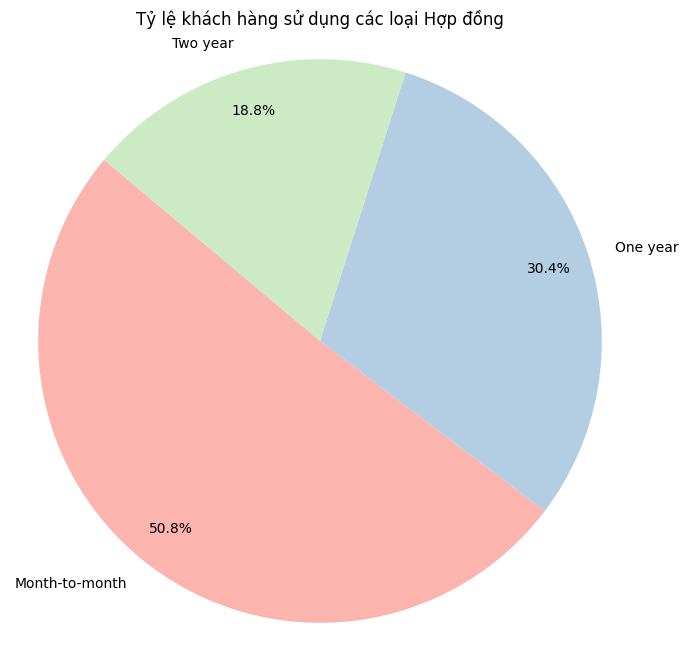

Chọn biểu đồ tròn (pie chart) vì nó rất phù hợp để thể hiện tỷ trọng hoặc thị phần của các phần trong 1 tổng thể. Với biểu đồ này, dễ dàng nhìn thấy tỷ lệ phần trăm của từng loại hợp đồng so với tổng số, giúp trả lời trực quan câu hỏi về 'tỷ lệ khách hàng sử dụng các loại Hợp đồng'.


In [45]:
#Câu hỏi 2: "Tỷ lệ khách hàng sử dụng các loại Hợp đồng (Contract_Type) khác nhau như thế nào?"
# Gợi ý: Biểu đồ nào tốt nhất để thể hiện thị phần/tỷ trọng?

import matplotlib.pyplot as plt

# Tính tỷ lệ khách hàng cho từng loại hợp đồng
contract_type_counts = df['Contract_Type'].value_counts()

# Chọn một colormap với các màu nhạt hơn
colors = plt.cm.Pastel1.colors 

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(contract_type_counts, labels=contract_type_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=colors)
plt.title('Tỷ lệ khách hàng sử dụng các loại Hợp đồng')
plt.axis('equal') # Đảm bảo biểu đồ tròn cân đối
plt.show()

# Giải thích lựa chọn biểu đồ
print("Chọn biểu đồ tròn (pie chart) vì nó rất phù hợp để thể hiện tỷ trọng hoặc thị phần của các phần trong 1 tổng thể. Với biểu đồ này, dễ dàng nhìn thấy tỷ lệ phần trăm của từng loại hợp đồng so với tổng số, giúp trả lời trực quan câu hỏi về 'tỷ lệ khách hàng sử dụng các loại Hợp đồng'.")